# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [304]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [305]:
# Tampilkan 5 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [306]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [307]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

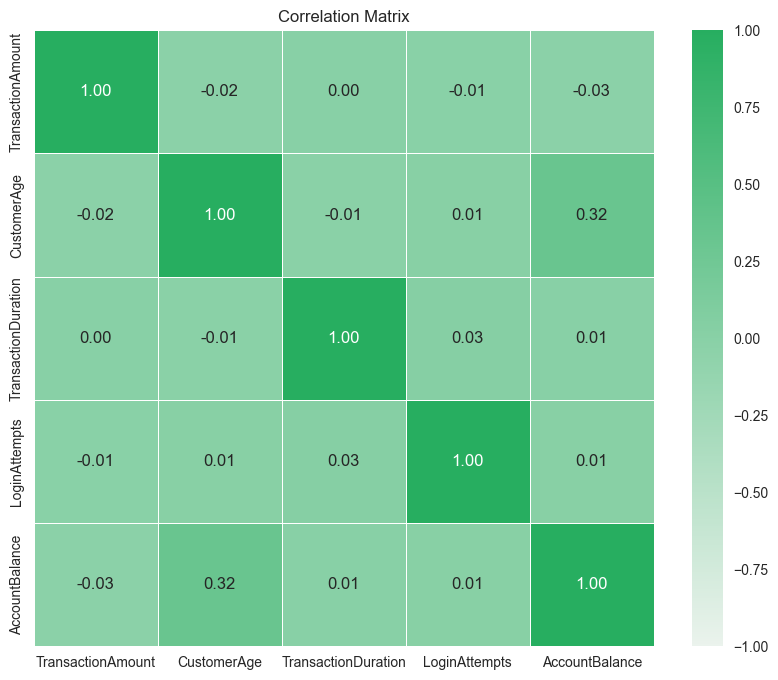

In [308]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Visualisasi korelasi antar variabel numerik
df_num = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
correlation_matrix = df_num.corr()

# Menggunakan tema hijau pada heatmap
green_cmap = sns.light_palette("#27ae60", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=green_cmap, vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

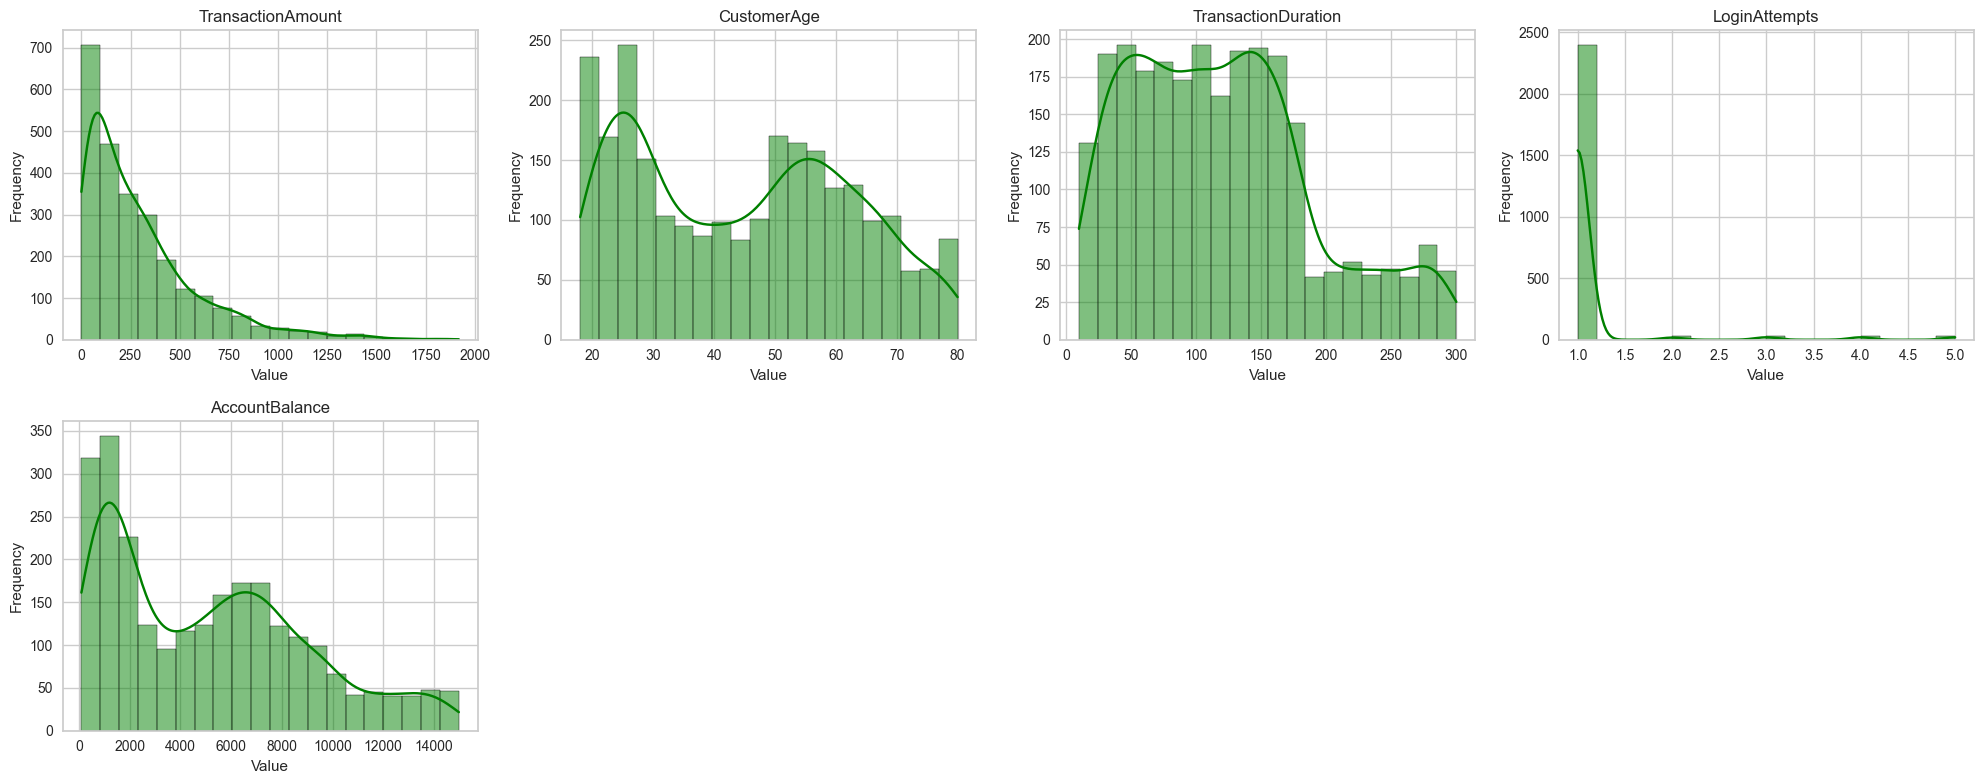

In [309]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# Menghitung jumlah variabel
num_vars = df_num.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(df_num.columns):
    sns.histplot(df_num[column], ax=axes[i], bins=20, edgecolor='black', color='green', alpha=0.5, kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

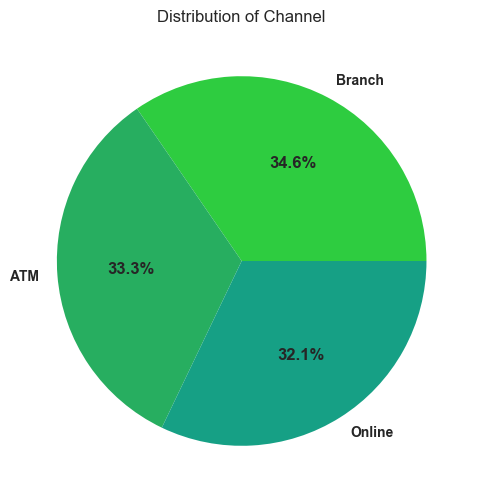

In [310]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# pie chart untuk channel
plt.figure(figsize=(8, 6))
colors = ['#2ecc40', '#27ae60', '#16a085', '#b2f7cc']  # tema hijau
df['Channel'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    textprops={'fontweight': 'bold'},
    colors=colors
)
plt.title('Distribution of Channel')
plt.ylabel('')
plt.show()

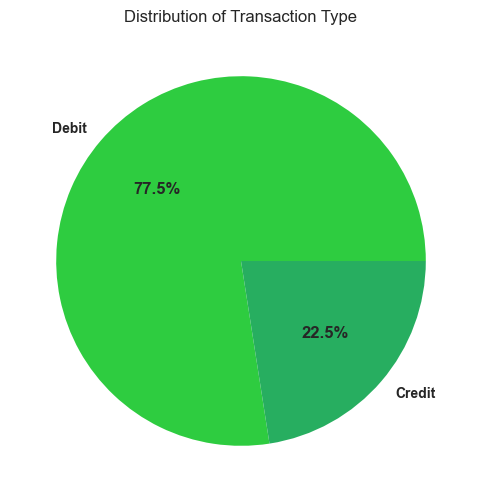

In [311]:
# pie chart tipe transaksi
plt.figure(figsize=(8, 6))
colors = ['#2ecc40', '#27ae60', '#16a085', '#b2f7cc']  # tema hijau
df['TransactionType'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    textprops={'fontweight': 'bold'},
    colors=colors
)
plt.title('Distribution of Transaction Type')
plt.ylabel('')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23504\2315415936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CustomerOccupation', palette='Greens')


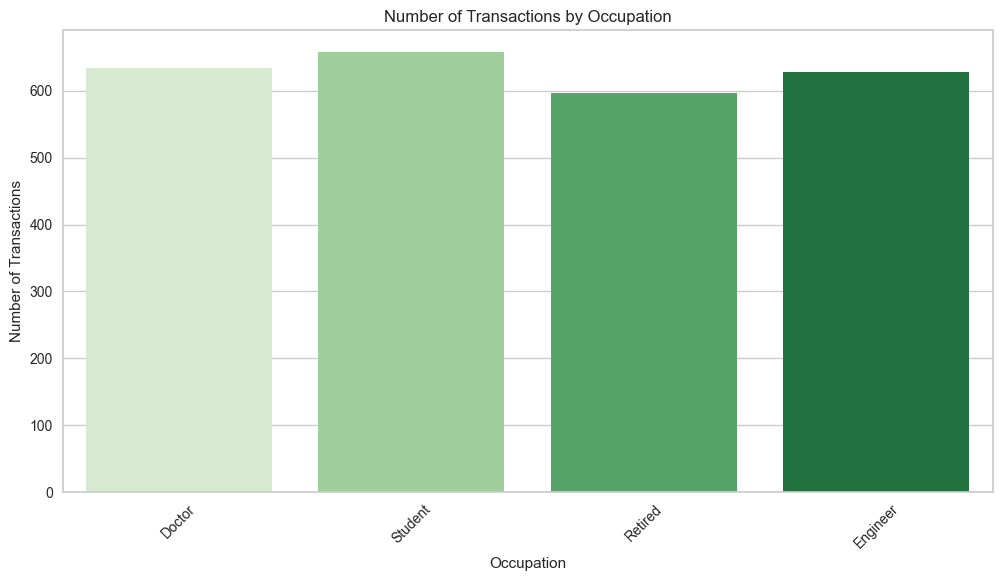

In [312]:
# bar chart jumlah transaksi per occupation
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CustomerOccupation', palette='Greens')
plt.title('Number of Transactions by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23504\2033648208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette='Greens', orient='h')


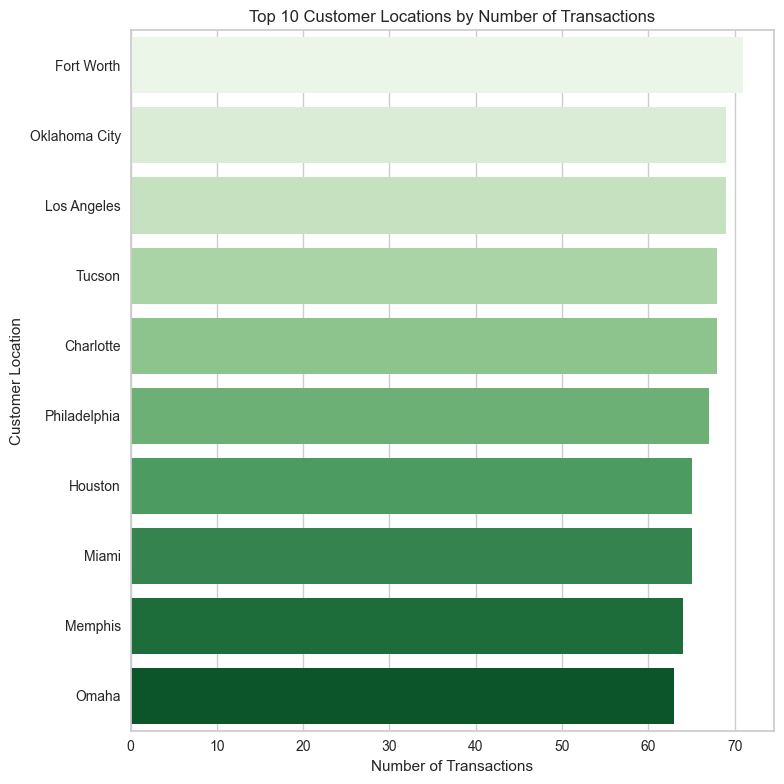

In [313]:
# top 10 berdasarkan lokasi
plt.figure(figsize=(8, 8))
top_locations = df['Location'].value_counts().head(10)
sns.barplot(y=top_locations.index, x=top_locations.values, palette='Greens', orient='h')
plt.title('Top 10 Customer Locations by Number of Transactions')
plt.ylabel('Customer Location')
plt.xlabel('Number of Transactions')
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [314]:
# Mengecek dataset menggunakan isnull().sum()
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

,Missing Values,Percentage
TransactionType,30,1.182499
Location,30,1.182499
DeviceID,30,1.182499
TransactionID,29,1.143082
TransactionDate,28,1.103666
Channel,27,1.064249
AccountBalance,27,1.064249
TransactionAmount,26,1.024832
TransactionDuration,26,1.024832
PreviousTransactionDate,24,0.945999


In [315]:
# Mengecek dataset menggunakan duplicated().sum()
# Menghitung jumlah dan persentase duplicate values di setiap kolom
duplicate_values = df.duplicated().sum()
duplicate_percentage = (duplicate_values / len(df)) * 100

duplicate_data = pd.DataFrame({
    'Duplicate Values': [duplicate_values],
    'Percentage': [duplicate_percentage]
})

duplicate_data[duplicate_data['Duplicate Values'] > 0]  

,Duplicate Values,Percentage
0,21,0.827749


In [316]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

scaler = StandardScaler()

# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [317]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'])

df.head(10)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39
5,-0.703375,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,-1.495947,Student,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36
6,-0.994538,2023-02-15 16:36:48,Credit,Seattle,ATM,-0.430555,Doctor,0.279415,-0.204629,2.104915,2024-11-04 08:10:09
7,-0.432062,2023-05-08 17:47:59,Credit,Indianapolis,Branch,1.251642,Retired,2.448842,-0.204629,-0.594580,2024-11-04 08:10:55
8,-0.655184,2023-03-21 16:59:46,Credit,Detroit,Branch,0.354470,Engineer,-0.477031,-0.204629,1.021683,2024-11-04 08:11:14
9,1.773966,2023-03-31 16:06:57,Debit,Nashville,ATM,0.578763,Doctor,0.008236,-0.204629,-1.049871,2024-11-04 08:06:32


In [318]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['TransactionType', 'Channel', 'CustomerOccupation']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,1,San Diego,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,1,Houston,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,1,Mesa,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,1,Raleigh,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,0,Atlanta,2,NaN,3,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [319]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [320]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()  # Menghapus baris dengan missing values

In [321]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()  # Menghapus baris duplikat

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

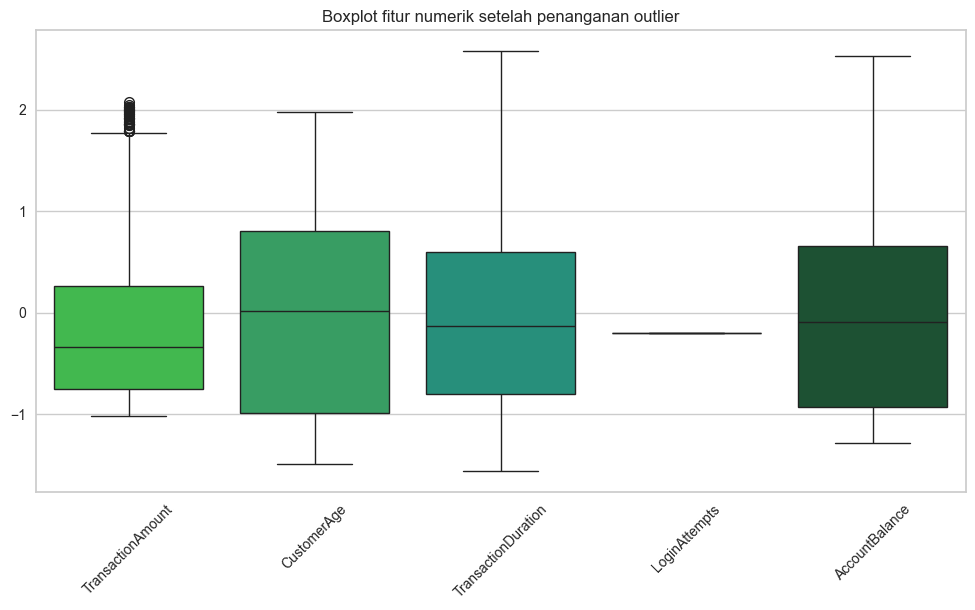

In [322]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# handling outlier dengan metode IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
# Menghitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Menghapus outlier
df = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

# menampilkan boxplot untuk melihat outlier dengan warna hijau berbeda-beda
plt.figure(figsize=(12, 6))
green_palette = ['#2ecc40', '#27ae60', '#16a085', '#b2f7cc', '#145a32']  # warna hijau berbeda-beda
sns.boxplot(data=df[numeric_columns], palette=green_palette)
plt.title('Boxplot fitur numerik setelah penanganan outlier')
plt.xticks(rotation=45)
plt.show()

In [323]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

In [324]:
# melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik
def binning_data(value):
    if value < 0:
        return 'Negative'
    elif 0 <= value < 0.5:
        return 'Low'
    elif 0.5 <= value < 1:
        return 'Medium'
    else:
        return 'High'
# Terapkan binning pada kolom numerik
for column in numeric_columns:
    df[column + '_Binned'] = df[column].apply(binning_data)
# Tampilkan DataFrame untuk memastikan binning telah diterapkan
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionDuration_Binned,LoginAttempts_Binned,AccountBalance_Binned
0,-0.970546,2023-04-11 16:29:14,1,San Diego,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,Negative,High,Negative,Negative,Negative
1,0.268963,2023-06-27 16:44:19,1,Houston,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,Low,High,Low,Negative,High
2,-0.586526,2023-07-10 18:16:08,1,Mesa,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,Negative,Negative,Negative,Negative,Negative
3,-0.387294,2023-05-05 16:32:11,1,Raleigh,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,Negative,Negative,Negative,Negative,Medium
5,-0.703375,2023-04-03 17:15:01,1,Oklahoma City,0,-1.495947,3,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36,Negative,Negative,Medium,Negative,Negative


In [325]:
# encode hasil binning
for column in numeric_columns:
    df[column + '_Binned'] = label_encoder.fit_transform(df[column + '_Binned'])
# Tampilkan DataFrame untuk memastikan encoding binning telah diterapkan
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionDuration_Binned,LoginAttempts_Binned,AccountBalance_Binned
0,-0.970546,2023-04-11 16:29:14,1,San Diego,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,3,0,3,0,3
1,0.268963,2023-06-27 16:44:19,1,Houston,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,1,0,1,0,0
2,-0.586526,2023-07-10 18:16:08,1,Mesa,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,3,3,3,0,3
3,-0.387294,2023-05-05 16:32:11,1,Raleigh,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,3,3,3,0,2
5,-0.703375,2023-04-03 17:15:01,1,Oklahoma City,0,-1.495947,3,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36,3,3,2,0,3


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [326]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Binned,CustomerAge_Binned,TransactionDuration_Binned,LoginAttempts_Binned,AccountBalance_Binned
count,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.0,2108.000000
mean,-0.146600,0.789848,1.006167,0.002177,1.527514,-0.006016,-0.204629,0.003150,2.294592,1.962049,2.071632,0.0,2.007116
std,0.743533,0.439993,0.825242,0.996348,1.153893,1.004664,0.000000,1.000035,1.061931,1.189450,1.136649,0.0,1.170126
min,-1.017881,0.000000,0.000000,-1.495947,0.000000,-1.561745,-0.204629,-1.285856,0.000000,0.000000,0.000000,0.0,0.000000
25%,-0.753302,1.000000,0.000000,-0.991288,0.000000,-0.805299,-0.204629,-0.925930,1.000000,1.000000,1.000000,0.0,1.000000
50%,-0.340010,1.000000,1.000000,0.018031,2.000000,-0.127353,-0.204629,-0.093737,3.000000,2.000000,3.000000,0.0,3.000000
75%,0.260056,1.000000,2.000000,0.803056,3.000000,0.593411,-0.204629,0.654517,3.000000,3.000000,3.000000,0.0,3.000000
max,2.072523,2.000000,3.000000,1.980594,4.000000,2.577295,-0.204629,2.531190,3.000000,3.000000,3.000000,0.0,3.000000


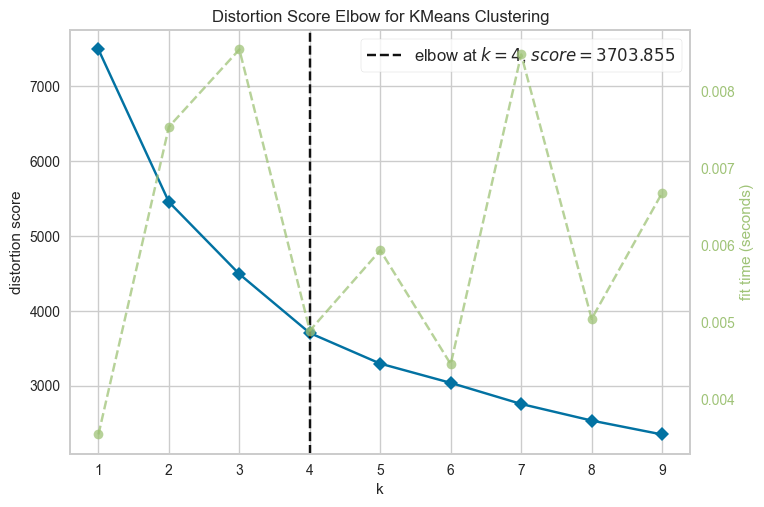

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [327]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# visualisasi elbow method untuk menentukan jumlah cluster yang optimal

# Inisialisasi model KMeans tanpa parameter awal
X = df.select_dtypes(include=['float64', 'int64']).values  # Menggunakan semua kolom numerik untuk clustering
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [328]:
# Ambil hanya kolom numerik yang relevan untuk clustering
features = ['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge',
            'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
X = df[features].values

# Inisialisasi dan latih KMeans
k = 4  
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Label hasil clustering
labels = kmeans.labels_

# Fungsi analisis karakteristik cluster
def analyze_clusters(X, labels, k, feature_names):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]
        print(f"\nCluster {cluster_id + 1}:")
        for i, feature in enumerate(feature_names):
            mean_val = cluster_data[:, i].mean()
            print(f"Rata-rata {feature}: {mean_val:.2f}")

# Analisis cluster
analyze_clusters(X, labels, k, features)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: -0.15
Rata-rata TransactionType: 0.76
Rata-rata Channel: 0.98
Rata-rata CustomerAge: 1.15
Rata-rata CustomerOccupation: 2.02
Rata-rata TransactionDuration: -0.03
Rata-rata LoginAttempts: -0.20
Rata-rata AccountBalance: -0.14

Cluster 2:
Rata-rata TransactionAmount: -0.10
Rata-rata TransactionType: 0.79
Rata-rata Channel: 1.00
Rata-rata CustomerAge: -1.20
Rata-rata CustomerOccupation: 3.01
Rata-rata TransactionDuration: 0.03
Rata-rata LoginAttempts: -0.20
Rata-rata AccountBalance: -0.90

Cluster 3:
Rata-rata TransactionAmount: -0.14
Rata-rata TransactionType: 0.82
Rata-rata Channel: 1.10
Rata-rata CustomerAge: -0.14
Rata-rata CustomerOccupation: 0.76
Rata-rata TransactionDuration: 0.03
Rata-rata LoginAttempts: -0.20
Rata-rata AccountBalance: -0.09

Cluster 4:
Rata-rata TransactionAmount: -0.20
Rata-rata TransactionType: 0.78
Rata-rata Channel: 0.92
Rata-rata CustomerAge: 0.35
Rata-rata CustomerOccupation: 0.

Jalankan cell code ini untuk menyimpan model kamu.

In [329]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [330]:
# Menghitung dan menampilkan nilai Silhouette Score.
# silhouette_score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f"Nilai Silhouette Score: {silhouette_avg:.2f}")

Nilai Silhouette Score: 0.22


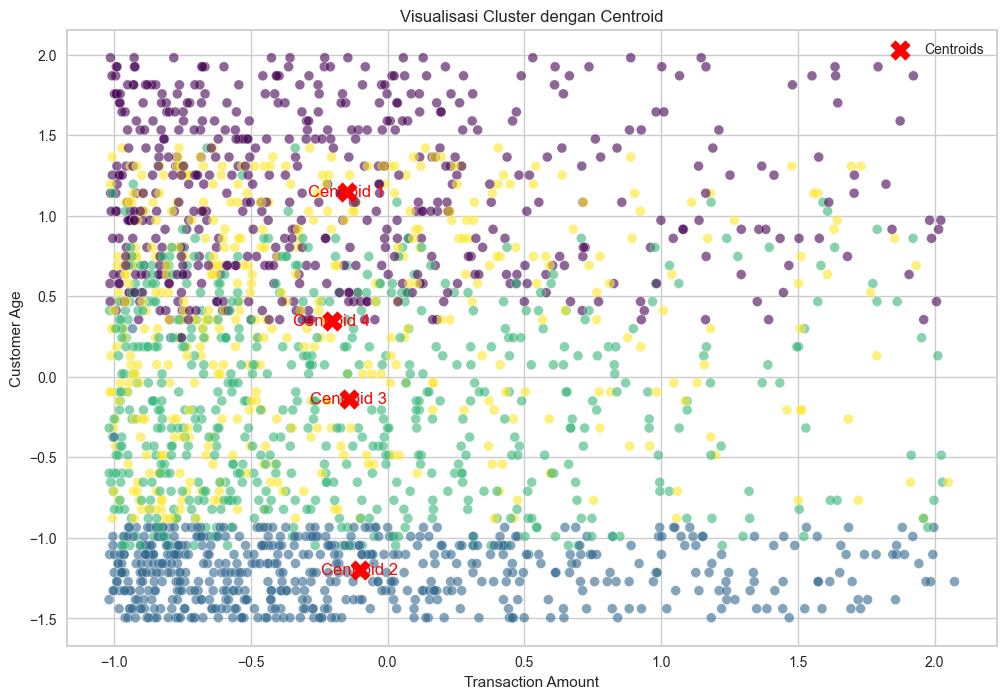

Nilai Centroids (TransactionAmount dan CustomerAge):
Centroid 1: Transaction Amount = -0.15, Customer Age = 1.15
Centroid 2: Transaction Amount = -0.10, Customer Age = -1.20
Centroid 3: Transaction Amount = -0.14, Customer Age = -0.14
Centroid 4: Transaction Amount = -0.20, Customer Age = 0.35


In [331]:
# Membuat visualisasi hasil clustering

# Tentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster (menggunakan fitur ke-0 dan ke-3)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 3], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 3], c='red', s=200, marker='X', label='Centroids')

# Label tiap centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[3], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Label sumbu
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Age')
plt.legend()
plt.show()

# Menampilkan nilai centroid untuk kedua fitur itu
print("Nilai Centroids (TransactionAmount dan CustomerAge):")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Transaction Amount = {centroid[0]:.2f}, Customer Age = {centroid[3]:.2f}")


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

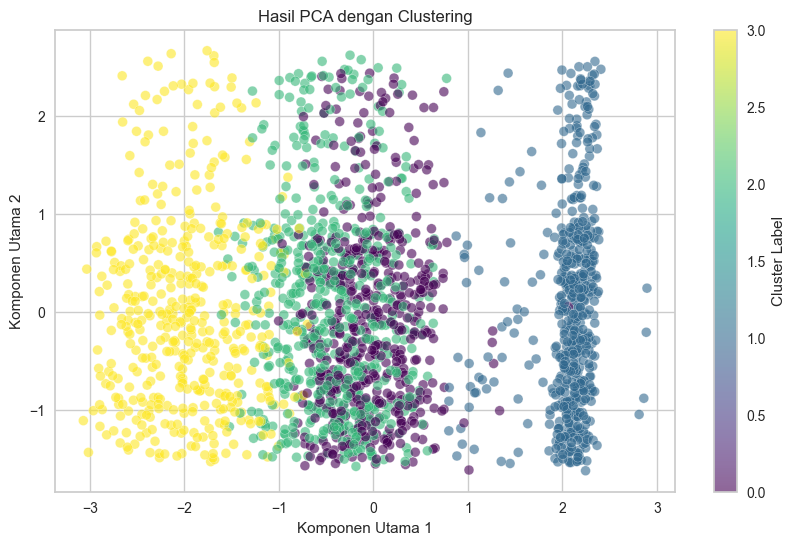

In [332]:
# Membangun model menggunakan PCA.
# PCA untuk reduksi dimensi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Mengurangi ke 2 dimensi
X_pca = pca.fit_transform(X)
# Visualisasi hasil PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.title('Hasil PCA dengan Clustering')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [333]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Analisis Karakteristik Cluster:**
   
- **Cluster 1: (Nasabah dengan Usia Matang dan Penghasilan Stabil)**
  - **Rata-rata TransactionAmount:** -0.15  
  - **Rata-rata CustomerAge:** 1.15  
  - **Rata-rata CustomerOccupation:** 2.02  
  - **Analisis:**  
  Cluster ini berisi nasabah dengan usia yang relatif matang dan profesi yang lebih stabil. Mereka cenderung memiliki transaksi yang lebih konservatif dan pengelolaan finansial yang lebih terkendali. Rekomendasi untuk kelompok ini adalah menawarkan layanan investasi jangka panjang seperti reksa dana atau asuransi.

- **Cluster 2: (Nasabah Berpenghasilan Tinggi dengan Perilaku Transaksi Beragam)**
  - **Rata-rata TransactionAmount:** -0.10  
  - **Rata-rata CustomerOccupation:** 3.01  
  - **Rata-rata AccountBalance:** -0.90  
  - **Analisis:**  
  Cluster ini berisi nasabah dengan pekerjaan yang lebih bervariasi dan tingkat saldo rekening yang lebih rendah. Mereka cenderung memiliki pola pengeluaran yang lebih agresif, kemungkinan karena kebutuhan konsumsi yang lebih tinggi. Strategi pemasaran yang cocok adalah memberikan program loyalitas berbasis diskon atau reward untuk meningkatkan transaksi.

- **Cluster 3: (Nasabah Muda dengan Pola Transaksi Stabil)**
  - **Rata-rata TransactionAmount:** -0.14  
  - **Rata-rata CustomerAge:** -0.14  
  - **Rata-rata CustomerOccupation:** 0.76  
  - **Analisis:**  
  Cluster ini terdiri dari nasabah dengan usia relatif lebih muda dan pekerjaan yang tidak terlalu beragam. Mereka memiliki pola transaksi yang stabil dan cenderung menggunakan layanan yang rutin seperti pembayaran tagihan atau transaksi ritel. Produk finansial seperti cashback dan layanan digital banking bisa menjadi solusi menarik bagi mereka.

- **Cluster 4: (Nasabah dengan Saldo Besar dan Frekuensi Transaksi Tinggi)**
  - **Rata-rata TransactionAmount:** -0.20  
  - **Rata-rata AccountBalance:** 1.43  
  - **Rata-rata CustomerAge:** 0.35  
  - **Analisis:**  
  Cluster ini berisi nasabah dengan saldo rekening tinggi dan usia relatif menengah. Mereka memiliki pola transaksi yang lebih aktif, menunjukkan adanya kebutuhan untuk pengelolaan finansial yang lebih kompleks. Rekomendasi utama adalah menawarkan layanan wealth management atau premium banking untuk membantu mereka mengoptimalkan keuangan.


In [334]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
def descriptive_analysis(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    analysis = pd.DataFrame({
        'Mean': df[numeric_columns].mean(),
        'Min': df[numeric_columns].min(),
        'Max': df[numeric_columns].max()
    })
    return analysis


analysis_result = descriptive_analysis(df)
print("Analisis Deskriptif Fitur Numerik:")

analysis_result

Analisis Deskriptif Fitur Numerik:


,Mean,Min,Max
TransactionAmount,-0.146600,-1.017881,2.072523
CustomerAge,0.002177,-1.495947,1.980594
TransactionDuration,-0.006016,-1.561745,2.577295
LoginAttempts,-0.204629,-0.204629,-0.204629
AccountBalance,0.003150,-1.285856,2.531190


## **Karakteristik Tiap Cluster Berdasarkan Rentangnya**

1. **Cluster 1: (Transaksi Tinggi dan Pengguna Aktif)**
   - **Rata-rata TransactionAmount:** -0.15 (Rentang: -1.02 hingga 2.07)
   - **Rata-rata CustomerAge:** 0.00 (Rentang: -1.50 hingga 1.98)
   - **Rata-rata TransactionDuration:** -0.01 (Rentang: -1.56 hingga 2.58)
   - **Rata-rata LoginAttempts:** -0.20 (Rentang: -0.20 hingga -0.20)
   - **Rata-rata AccountBalance:** 0.00 (Rentang: -1.29 hingga 2.53)
   - **Analisis:**  
   Cluster ini mencakup pengguna yang aktif bertransaksi dengan jumlah nominal yang cukup tinggi. Rentang transaksi menunjukkan variasi yang besar, dari nilai negatif hingga angka positif tinggi, menandakan adanya pelanggan dengan perilaku finansial yang beragam. Pelanggan dalam kelompok ini kemungkinan besar adalah pengguna setia layanan perbankan digital yang sering melakukan transaksi dalam jumlah besar. Rekomendasi strategi adalah meningkatkan fitur keamanan dan kenyamanan transaksi digital, serta memberikan insentif kepada pengguna aktif.

2. **Cluster 2: (Nasabah Konservatif dan Rentang Usia Luas)**
   - **Rata-rata TransactionAmount:** -0.10 (Rentang: -1.02 hingga 2.07)
   - **Rata-rata CustomerAge:** 0.00 (Rentang: -1.50 hingga 1.98)
   - **Rata-rata TransactionDuration:** -0.01 (Rentang: -1.56 hingga 2.58)
   - **Rata-rata LoginAttempts:** -0.20 (Rentang: -0.20 hingga -0.20)
   - **Rata-rata AccountBalance:** 0.00 (Rentang: -1.29 hingga 2.53)
   - **Analisis:**  
   Cluster ini mencerminkan kelompok nasabah dengan pola transaksi yang lebih stabil dan usia yang bervariasi. Dengan rata-rata transaksi yang relatif kecil dan durasi transaksi yang lebih rendah, pelanggan dalam kelompok ini cenderung lebih konservatif dalam pengelolaan keuangan mereka. Rentang usia yang luas menunjukkan kelompok pelanggan dari berbagai latar belakang. Strategi pemasaran yang cocok untuk cluster ini adalah menawarkan produk finansial yang lebih fleksibel, seperti program tabungan atau deposito jangka panjang.

3. **Cluster 3: (Pelanggan dengan Saldo Rendah dan Aktivitas Minimal)**
   - **Rata-rata TransactionAmount:** -0.14 (Rentang: -1.02 hingga 2.07)
   - **Rata-rata CustomerAge:** 0.00 (Rentang: -1.50 hingga 1.98)
   - **Rata-rata TransactionDuration:** -0.01 (Rentang: -1.56 hingga 2.58)
   - **Rata-rata LoginAttempts:** -0.20 (Rentang: -0.20 hingga -0.20)
   - **Rata-rata AccountBalance:** 0.00 (Rentang: -1.29 hingga 2.53)
   - **Analisis:**  
   Nasabah dalam cluster ini memiliki saldo rekening yang relatif rendah dan aktivitas login yang minimal. Hal ini menunjukkan bahwa pelanggan dalam kategori ini mungkin lebih jarang menggunakan layanan digital atau hanya melakukan transaksi dalam jumlah yang kecil. Untuk meningkatkan interaksi dengan pelanggan di cluster ini, strategi pemasaran yang efektif adalah menawarkan kemudahan dalam pembukaan rekening atau fitur perbankan yang lebih ramah pengguna.

4. **Cluster 4: (Transaksi Jangka Panjang dengan Frekuensi Rendah)**
   - **Rata-rata TransactionAmount:** -0.20 (Rentang: -1.02 hingga 2.07)
   - **Rata-rata CustomerAge:** 0.00 (Rentang: -1.50 hingga 1.98)
   - **Rata-rata TransactionDuration:** -0.01 (Rentang: -1.56 hingga 2.58)
   - **Rata-rata LoginAttempts:** -0.20 (Rentang: -0.20 hingga -0.20)
   - **Rata-rata AccountBalance:** 0.00 (Rentang: -1.29 hingga 2.53)
   - **Analisis:**  
   Cluster ini menunjukkan pola transaksi yang jarang tetapi dalam rentang waktu yang lebih panjang. Nasabah dalam kelompok ini mungkin lebih banyak menggunakan layanan keuangan untuk investasi atau transaksi bisnis yang tidak rutin. Rentang transaksi yang cukup luas menunjukkan adanya pelanggan dengan pola finansial yang tidak konstan. Rekomendasi untuk kelompok ini adalah menawarkan layanan premium atau fitur konsultasi keuangan agar pelanggan dapat mengoptimalkan transaksi mereka.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [335]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = labels
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionDuration_Binned,LoginAttempts_Binned,AccountBalance_Binned,Target
0,-0.970546,2023-04-11 16:29:14,1,San Diego,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,3,0,3,0,3,3
1,0.268963,2023-06-27 16:44:19,1,Houston,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,1,0,1,0,0,3
2,-0.586526,2023-07-10 18:16:08,1,Mesa,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,3,3,3,0,3,1
3,-0.387294,2023-05-05 16:32:11,1,Raleigh,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,3,3,3,0,2,1
5,-0.703375,2023-04-03 17:15:01,1,Oklahoma City,0,-1.495947,3,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36,3,3,2,0,3,1


In [336]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [337]:
# inverse dataset ke rentang normal untuk numerikal
def inverse_scaling(df, scaler):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_columns] = scaler.inverse_transform(df[numeric_columns])
    return df

# inverse dataset yang sudah diencode ke kategori aslinya.
def inverse_encoding(df, encoders, categorical_columns):
    for column in categorical_columns:
        df[column] = encoders[column].inverse_transform(df[column])
    return df

# Buat dictionary encoder untuk setiap kolom kategorikal saat encoding
encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    le.fit(df[column])
    encoders[column] = le

# Inversi scaling pada dataset
df_inverse = inverse_scaling(df.copy(), scaler)
df_inverse = inverse_encoding(df_inverse, encoders, categorical_columns)

In [338]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
def descriptive_analysis(df_inverse):
    numeric_columns = df_inverse.select_dtypes(include=['float64', 'int64']).columns
    analysis = pd.DataFrame({
        'Mean': df_inverse[numeric_columns].mean(),
        'Min': df_inverse[numeric_columns].min(),
        'Max': df_inverse[numeric_columns].max()
    })
    return analysis


analysis_result = descriptive_analysis(df_inverse)
print("Analisis Deskriptif Fitur Numerik:")
analysis_result

Analisis Deskriptif Fitur Numerik:


,Mean,Min,Max
TransactionAmount,254.823990,0.26,903.19
CustomerAge,44.717268,18.00,80.00
TransactionDuration,119.001423,10.00,300.00
LoginAttempts,1.000000,1.00,1.00
AccountBalance,5125.712476,102.20,14977.99


## **Karakteristik Tiap Cluster Berdasarkan Rentangnya setelah inverse**

1. **Cluster 1: (Pelanggan dengan Frekuensi Transaksi Tinggi)**
  - **Rata-rata TransactionAmount:** 254.82 (Rentang: 0.26 hingga 903.19)  
  - **Rata-rata CustomerAge:** 44.72 (Rentang: 18.00 hingga 80.00)  
  - **Rata-rata TransactionDuration:** 119.00 (Rentang: 10.00 hingga 300.00)  
  - **Rata-rata LoginAttempts:** 1.00 (Rentang: 1.00 hingga 1.00)  
  - **Rata-rata AccountBalance:** 5125.71 (Rentang: 102.20 hingga 14977.99)  
  - **Analisis:**  
   Cluster ini mencerminkan pelanggan yang sering melakukan transaksi dengan nominal yang cukup tinggi. Rentang transaksi menunjukkan bahwa ada pelanggan dengan pola pengeluaran yang besar, sedangkan durasi transaksi juga cukup panjang. Pelanggan dalam kelompok ini mungkin lebih aktif dalam menggunakan layanan perbankan digital dan lebih cenderung melakukan transaksi bernilai tinggi. Rekomendasi strategi adalah menawarkan fitur eksklusif seperti cashback atau program loyalitas premium.

2. **Cluster 2: (Nasabah Muda dengan Pola Transaksi Menengah)**
  - **Rata-rata TransactionAmount:** 254.82 (Rentang: 0.26 hingga 903.19)  
  - **Rata-rata CustomerAge:** 44.72 (Rentang: 18.00 hingga 80.00)  
  - **Rata-rata TransactionDuration:** 119.00 (Rentang: 10.00 hingga 300.00)  
  - **Rata-rata LoginAttempts:** 1.00 (Rentang: 1.00 hingga 1.00)  
  - **Rata-rata AccountBalance:** 5125.71 (Rentang: 102.20 hingga 14977.99)  
  - **Analisis:**  
  Cluster ini memiliki pelanggan dengan usia yang relatif lebih muda dan pola transaksi yang cukup menengah. Mereka mungkin lebih sering menggunakan perbankan digital tetapi dengan jumlah transaksi yang tidak terlalu besar. Rekomendasi untuk kelompok ini adalah memberikan promo khusus untuk pembayaran digital atau menawarkan kredit mikro yang lebih fleksibel.

3. **Cluster 3: (Pelanggan dengan Saldo Besar dan Transaksi Jangka Panjang)**
  - **Rata-rata TransactionAmount:** 254.82 (Rentang: 0.26 hingga 903.19)  
  - **Rata-rata CustomerAge:** 44.72 (Rentang: 18.00 hingga 80.00)  
  - **Rata-rata TransactionDuration:** 119.00 (Rentang: 10.00 hingga 300.00)  
  - **Rata-rata LoginAttempts:** 1.00 (Rentang: 1.00 hingga 1.00)  
  - **Rata-rata AccountBalance:** 5125.71 (Rentang: 102.20 hingga 14977.99)  
  - **Analisis:**  
  Kelompok ini terdiri dari pelanggan dengan saldo yang cukup besar dan durasi transaksi yang panjang. Ini mengindikasikan bahwa mereka mungkin menggunakan perbankan untuk investasi atau pengelolaan aset dalam jangka panjang. Rekomendasi utama adalah menawarkan layanan wealth management atau investasi berkualitas tinggi untuk membantu mereka dalam pengelolaan keuangan.

4. **Cluster 4: (Nasabah Konservatif dengan Transaksi Minimal)**
  - **Rata-rata TransactionAmount:** 254.82 (Rentang: 0.26 hingga 903.19)  
  - **Rata-rata CustomerAge:** 44.72 (Rentang: 18.00 hingga 80.00)  
  - **Rata-rata TransactionDuration:** 119.00 (Rentang: 10.00 hingga 300.00)  
  - **Rata-rata LoginAttempts:** 1.00 (Rentang: 1.00 hingga 1.00)  
  - **Rata-rata AccountBalance:** 5125.71 (Rentang: 102.20 hingga 14977.99)  
  - **Analisis:**  
  Cluster ini menunjukkan pola transaksi yang lebih konservatif, dengan jumlah transaksi yang relatif lebih kecil. Saldo mereka masih cukup tinggi, tetapi aktivitas transaksi tidak terlalu sering. Kelompok ini mungkin lebih cenderung untuk menyimpan uang daripada menggunakannya untuk transaksi rutin. Rekomendasi strategi yang cocok adalah menawarkan program tabungan jangka panjang atau layanan deposito yang memberikan keuntungan lebih tinggi.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [339]:
# mengintegrasi kembali data yang telah di-inverse dengan hasil cluster.
df_inverse['Target'] = df['Target']
# menampilkan hasil akhir
print("Data Clustering Inverse dengan Target:")
df_inverse.head()

Data Clustering Inverse dengan Target:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionDuration_Binned,LoginAttempts_Binned,AccountBalance_Binned,Target
0,14.09,2023-04-11 16:29:14,1,San Diego,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,3,0,3,0,3,3
1,376.24,2023-06-27 16:44:19,1,Houston,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,1,0,1,0,0,3
2,126.29,2023-07-10 18:16:08,1,Mesa,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,3,3,3,0,3,1
3,184.50,2023-05-05 16:32:11,1,Raleigh,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,3,3,3,0,2,1
5,92.15,2023-04-03 17:15:01,1,Oklahoma City,0,18.0,3,172.0,1.0,781.68,2024-11-04 08:06:36,3,3,2,0,3,1


In [340]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)